# Web Scraping Scripts using Selenium

In [68]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import os
from bs4 import BeautifulSoup
import time
import re


# Navigate to the website
url = 'https://transcripts.foreverdreaming.org/viewforum.php?f=574&sid=280ef9218a1ee1851116edd954c896e5&start=78'
driver = webdriver.Edge()
driver.get(url)

def find_by_class(selector, text=""):
    return [element for element in driver.find_elements(By.CLASS_NAME, selector) if text in element.text]

def clean_file_name(file_name):
    # Remove invalid characters from the file name
    cleaned_name = re.sub(r'[<>:"/\\|?*]', '_', file_name)
    return cleaned_name

# Locate and extract content from tiles with 04x## configuration
time.sleep(10)
episodes = find_by_class("topictitle", "04x")
episode_list = []
for n in range(0,len(episodes)):
    episode = episodes[n].text
    episode_list.append(episode)
hrefs_list =[]
# Loop through episodes and get hrefs
for n in range(0, len(episodes)):
    driver.get(url)
    episode_link = driver.find_element(By.XPATH, f'//a[contains(text(), "{episode_list[n]}")]')
    
    # Get the href attribute of the episode link
    episode_href = episode_link.get_attribute("href")
    
    hrefs_list .append(episode_href)
    # Print the href
    print(f"Href for {episode_list[n]}: {episode_href}")
    
    driver.get(episode_href)


    content = driver.find_element(By.CLASS_NAME, "content")

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(content.text, 'html.parser')

    # Print out the readable version
#     print(soup.prettify())
    # Save content to a text file
    file_name = episode_list[n]
    cleaned_file_name = clean_file_name(file_name)
    file_path = os.path.join("C:\\Users\\Owner\\Documents\\The Office Season 4 Scripts\\", cleaned_file_name + ".txt")
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(soup.prettify())


Href for 04x99 - Deleted Scenes from Season 4: https://transcripts.foreverdreaming.org/viewtopic.php?t=25370
Href for 04x18/19 - Goodbye, Toby (Parts 1&2): https://transcripts.foreverdreaming.org/viewtopic.php?t=25369
Href for 04x17 - Job Fair: https://transcripts.foreverdreaming.org/viewtopic.php?t=25368
Href for 04x16 - Did I Stutter?: https://transcripts.foreverdreaming.org/viewtopic.php?t=25367
Href for 04x15 - Night Out: https://transcripts.foreverdreaming.org/viewtopic.php?t=25366
Href for 04x14 - Chair Model: https://transcripts.foreverdreaming.org/viewtopic.php?t=25365
Href for 04x13 - Dinner Party: https://transcripts.foreverdreaming.org/viewtopic.php?t=25364
Href for 04x12 - The Deposition: https://transcripts.foreverdreaming.org/viewtopic.php?t=25363
Href for 04x11 - Survivor Man: https://transcripts.foreverdreaming.org/viewtopic.php?t=25362
Href for 04x10 - Branch Wars: https://transcripts.foreverdreaming.org/viewtopic.php?t=25361
Href for 04x09 - Local Ad: https://transcri

In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
NER = spacy.load("en_core_web_sm")

# Load Scripts

In [15]:
import os

#all except the deleted scenes
all_scripts = [s for s in os.scandir("C:\\Users\\Owner\\Documents\\The Office Season 4 Scripts\\")][:-1]

In [16]:
all_scripts

[<DirEntry '04x01_02 - Fun Run (Parts 1&2).txt'>,
 <DirEntry '04x03_04 - Dunder Mifflin Infinity (Parts 1&2).txt'>,
 <DirEntry '04x05_06 - Launch Party (Parts 1&2).txt'>,
 <DirEntry '04x07_08 - Money (Parts 1&2).txt'>,
 <DirEntry '04x09 - Local Ad.txt'>,
 <DirEntry '04x10 - Branch Wars.txt'>,
 <DirEntry '04x11 - Survivor Man.txt'>,
 <DirEntry '04x12 - The Deposition.txt'>,
 <DirEntry '04x13 - Dinner Party.txt'>,
 <DirEntry '04x14 - Chair Model.txt'>,
 <DirEntry '04x15 - Night Out.txt'>,
 <DirEntry '04x16 - Did I Stutter_.txt'>,
 <DirEntry '04x17 - Job Fair.txt'>,
 <DirEntry '04x18_19 - Goodbye, Toby (Parts 1&2).txt'>]

In [17]:
import os

# Specify the directory containing the text files
directory = "C:\\Users\\Owner\\Documents\\The Office Season 4 Scripts\\"

# Specify the name of the output file
output_file = "season_4_all_scripts.txt"
file_path = os.path.join("C:\\Users\\Owner\\Documents\\The Office Season 4 Scripts\\", output_file)

# Get a list of all text files in the directory
text_files = [file.path for file in os.scandir(directory)]

# Open the output file in write mode
with open(file_path, 'w', encoding='utf-8') as output:
    # Loop through each text file (excluding the last one) and append its content to the output file
    for text_file in text_files[:-1]:
        with open(text_file, 'r', encoding='utf-8') as file:
            output.write(file.read() + "\n")

print(f"All text files (except the last one) have been merged into {output_file}.")

# Open the input file in read mode
with open(file_path, 'r', encoding='utf-8') as input_file:
    # Read the content of the input file
    season4_scripts = file_path

All text files (except the last one) have been merged into season_4_all_scripts.txt.


In [18]:
season4_scripts

'C:\\Users\\Owner\\Documents\\The Office Season 4 Scripts\\season_4_all_scripts.txt'

In [19]:
script_text = open(season4_scripts).read()
script_doc = NER(script_text)

In [20]:
#Visualize indentified entities
displacy.render(script_doc, style="ent", jupyter=True)

# Get named entiity list per sentence

In [21]:
#Getting the entitiies from each sentence
sent_entity_df = []

for sent in script_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})

sent_entity_df = pd.DataFrame(sent_entity_df)

In [22]:
sent_entity_df

,sentence,entities
0,"(Michael, :)",[Michael]
1,"(Ok, ,, well, I, did, not, get, the, job, in, ...",[New York]
2,"(Jan, made, me, breakfast, this, morning, ...)","[Jan, this morning]"
3,"(well, she, bought, the, milk, .)",[]
4,"(It, 's, soy, .)",[]
...,...,...
9748,"(Like, a, runner, 's, high, .)",[]
9749,"([, gets, out, of, elevator, ;, hears, moans, ...","[moans, Dwight, Angela]"
9750,"([, sees, Phyllis, ;, gasps, ])",[Phyllis]
9751,"(Oh, my, God, !, \n\n, Dwight, :, What, ?)",[]


# Load character names

In [23]:
character_df = pd.read_excel(r"C:\Users\Owner\Documents\Office Character names.xlsx")

#From Website https://theoffice.fandom.com/wiki/List_of_The_Office_Characters

In [24]:
character_df['Characters_firstname'] = character_df['Characters'].apply(lambda x: x.split(' ', 1)[0])

In [25]:
character_df

,Characters,Characters_firstname
0,Michael Scott,Michael
1,Dwight Schrute,Dwight
2,Jim Halpert,Jim
3,Pam Beesly,Pam
4,Ryan Howard,Ryan
5,Andy Bernard,Andy
6,Robert California,Robert
7,Starrring characters,Starrring
8,Stanley Hudson,Stanley
9,Kevin Malone,Kevin


In [26]:
#function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list
        if ent in list(character_df.Characters)
        or ent in list(character_df.Characters_firstname)]

In [27]:
filter_entity(["Jim", "Michael", "Alonzo"], character_df)

['Jim', 'Michael']

In [28]:
#Matching character_entities with the character list
sent_entity_df["character_entities"] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

#remove sentneces without entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) >0 ]
sent_entity_df_filtered.head(10)

,sentence,entities,character_entities
0,"(Michael, :)",[Michael],[Michael]
2,"(Jan, made, me, breakfast, this, morning, ...)","[Jan, this morning]",[Jan]
5,"([, walks, into, bedroom, ,, Jan, sleeping, on...",[Jan],[Jan]
9,"(Michael, :)",[Michael],[Michael]
12,"(Jan, is, at, home, .)",[Jan],[Jan]
13,"(Jim, is, back, .)",[Jim],[Jim]
14,"(My, protege, Ryan, is, at, corporate, .)",[Ryan],[Ryan]
16,"(Um, ..., Andy, and, Dwight, are, rockin, ', t...","[Andy, Dwight]","[Andy, Dwight]"
18,"([, slams, on, breaks, ,, camera, turns, ,, Me...",[Meredith],[Meredith]
24,"(Jim, :, Really, ,, what, kind, of, celebrity,...",[Jim],[Jim]


In [29]:
#take only first name
sent_entity_df_filtered["character_entities"] = sent_entity_df_filtered["character_entities"].apply(lambda x: [item.split()[0]
                                                                                             for item in x])

C:\Users\Owner\AppData\Local\Temp\ipykernel_14536\3915888908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered["character_entities"] = sent_entity_df_filtered["character_entities"].apply(lambda x: [item.split()[0]


In [30]:
sent_entity_df_filtered.head(10)

,sentence,entities,character_entities
0,"(Michael, :)",[Michael],[Michael]
2,"(Jan, made, me, breakfast, this, morning, ...)","[Jan, this morning]",[Jan]
5,"([, walks, into, bedroom, ,, Jan, sleeping, on...",[Jan],[Jan]
9,"(Michael, :)",[Michael],[Michael]
12,"(Jan, is, at, home, .)",[Jan],[Jan]
13,"(Jim, is, back, .)",[Jim],[Jim]
14,"(My, protege, Ryan, is, at, corporate, .)",[Ryan],[Ryan]
16,"(Um, ..., Andy, and, Dwight, are, rockin, ', t...","[Andy, Dwight]","[Andy, Dwight]"
18,"([, slams, on, breaks, ,, camera, turns, ,, Me...",[Meredith],[Meredith]
24,"(Jim, :, Really, ,, what, kind, of, celebrity,...",[Jim],[Jim]


# Create Relationships

In [31]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i + 5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities),[])
    
    #Remove Duplicated characters
    char_unique = [char_list[i] for i in range(len(char_list))
                  if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [32]:
relationship_df = pd.DataFrame(relationships)

In [33]:
relationship_df

,source,target
0,Michael,Jan
1,Jan,Michael
2,Jan,Michael
3,Michael,Jan
4,Michael,Jan
...,...,...
11201,Angela,Phyllis
11202,Dwight,Angela
11203,Angela,Phyllis
11204,Dwight,Angela


In [34]:
#sort cases with a to b and b to a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis=1), columns = relationship_df.columns)
relationship_df

,source,target
0,Jan,Michael
1,Jan,Michael
2,Jan,Michael
3,Jan,Michael
4,Jan,Michael
...,...,...
11201,Angela,Phyllis
11202,Angela,Dwight
11203,Angela,Phyllis
11204,Angela,Dwight


In [35]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source", "target"], sort=False, as_index=False).sum()

In [36]:
relationship_df.head(10)

,source,target,value
0,Jan,Michael,742
1,Jan,Jim,50
2,Jim,Ryan,279
3,Andy,Ryan,40
4,Andy,Dwight,37
5,Dwight,Meredith,14
6,Jim,Karen,88
7,Jim,Kevin,148
8,Kevin,Pam,15
9,Jim,Pam,46


# Graph analysis and Visualization

In [37]:
#create a graph from df
G = nx.from_pandas_edgelist(relationship_df,
                           source= "source",
                           target = "target",
                           edge_attr = "value",
                           create_using = nx.Graph())

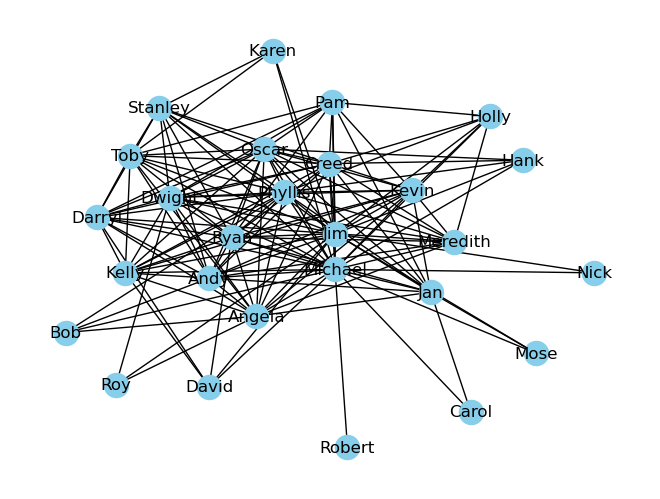

In [38]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color = "skyblue", edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

Graph Visualization - Pyvis

In [42]:
from pyvis.network import Network
net= Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color="white")
net.repulsion()

node_degree = dict(G.degree)


#setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')


net.from_nx(G)
net.show("office_season4.html")

office_season4.html


In [43]:
dict(G.degree)

{'Jan': 12,
 'Michael': 25,
 'Jim': 23,
 'Ryan': 17,
 'Andy': 16,
 'Dwight': 15,
 'Meredith': 11,
 'Karen': 4,
 'Kevin': 14,
 'Pam': 11,
 'Oscar': 17,
 'Stanley': 11,
 'Phyllis': 17,
 'Angela': 16,
 'Darryl': 14,
 'Kelly': 13,
 'Creed': 17,
 'Bob': 4,
 'Roy': 3,
 'Toby': 13,
 'David': 5,
 'Robert': 1,
 'Carol': 2,
 'Mose': 3,
 'Nick': 2,
 'Hank': 5,
 'Holly': 7}

# The importance of this character in Season 4

In [45]:
#degree centrality
#Degree centrality is a measure used in network analysis to assess the importance of a node within a network
degree_dict = nx.degree_centrality(G)
degree_dict

{'Jan': 0.46153846153846156,
 'Michael': 0.9615384615384616,
 'Jim': 0.8846153846153847,
 'Ryan': 0.6538461538461539,
 'Andy': 0.6153846153846154,
 'Dwight': 0.576923076923077,
 'Meredith': 0.42307692307692313,
 'Karen': 0.15384615384615385,
 'Kevin': 0.5384615384615385,
 'Pam': 0.42307692307692313,
 'Oscar': 0.6538461538461539,
 'Stanley': 0.42307692307692313,
 'Phyllis': 0.6538461538461539,
 'Angela': 0.6153846153846154,
 'Darryl': 0.5384615384615385,
 'Kelly': 0.5,
 'Creed': 0.6538461538461539,
 'Bob': 0.15384615384615385,
 'Roy': 0.11538461538461539,
 'Toby': 0.5,
 'David': 0.19230769230769232,
 'Robert': 0.038461538461538464,
 'Carol': 0.07692307692307693,
 'Mose': 0.11538461538461539,
 'Nick': 0.07692307692307693,
 'Hank': 0.19230769230769232,
 'Holly': 0.2692307692307693}

<Axes: >

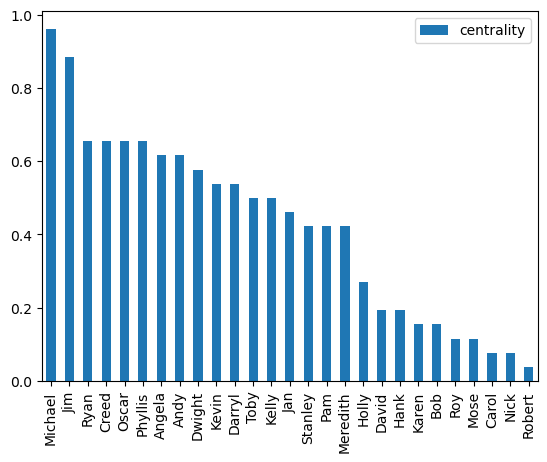

In [46]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
#Plot top nodes
degree_df.sort_values('centrality', ascending=False).plot(kind='bar')

<Axes: >

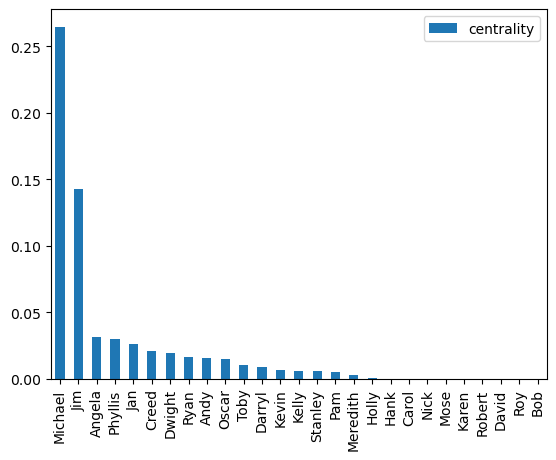

In [47]:
#betweenness centrality
btwn_dict = nx.betweenness_centrality(G)
btwn_df = pd.DataFrame.from_dict(btwn_dict, orient='index', columns=['centrality'])
#Plot top nodes
btwn_df.sort_values('centrality', ascending=False).plot(kind='bar')

<Axes: >

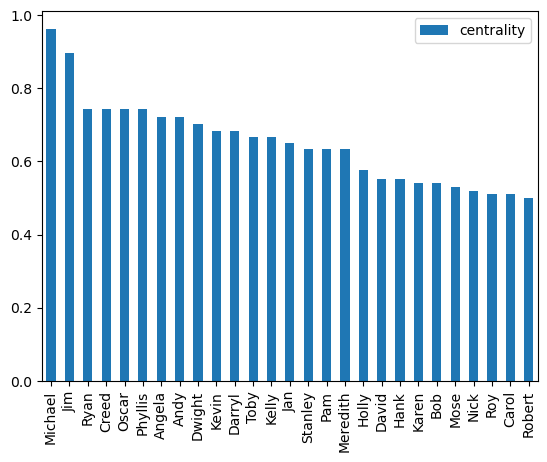

In [48]:
#Closeness centrality
close_dict = nx.closeness_centrality(G)
close_df = pd.DataFrame.from_dict(close_dict, orient='index', columns=['centrality'])
#Plot top nodes
close_df.sort_values('centrality', ascending=False).plot(kind='bar')

In [49]:
#save centrality measures
nx.set_node_attributes(G,degree_dict, "degree_centrality_szn4" )
nx.set_node_attributes(G,btwn_dict, "betweenness_centrality_szn4" )
nx.set_node_attributes(G,close_dict, "closeness_centrality_szn4" )

# Community Detection

In [50]:
import community


In [51]:
communities = community.best_partition(G)

In [52]:
communities

{'Jan': 1,
 'Michael': 1,
 'Jim': 0,
 'Ryan': 3,
 'Andy': 3,
 'Dwight': 3,
 'Meredith': 2,
 'Karen': 0,
 'Kevin': 2,
 'Pam': 2,
 'Oscar': 2,
 'Stanley': 0,
 'Phyllis': 3,
 'Angela': 3,
 'Darryl': 3,
 'Kelly': 3,
 'Creed': 2,
 'Bob': 3,
 'Roy': 3,
 'Toby': 0,
 'David': 3,
 'Robert': 1,
 'Carol': 1,
 'Mose': 1,
 'Nick': 0,
 'Hank': 2,
 'Holly': 2}

In [53]:
nx.set_node_attributes(G, communities, 'group')

In [56]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.repulsion()
com_net.show("office_season4_comunities.html")

office_season4_comunities.html


In [ ]:
se